In [28]:
from fastai.tabular.all import *
from warnings import simplefilter
set_seed(42)
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

In [29]:
df = pd.read_csv('clinvar.hg19.chr21.dbnsfp.tsv', sep='\t')
mixed_type = [98,99,101,102,131,132,133,134,135,136,153,154,155,169,170,171,172,646,650,651,675,676,677,678,679,681,682,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,705,706,717,718,719,720,721,722,723,724,725,730]
for column in mixed_type:
    df.iloc[:, column] = pd.to_numeric(df.iloc[:, column], errors='coerce')
df.replace(to_replace='.', value=np.nan, inplace=True)
df.replace(regex='^[.;]+$', value=np.nan, inplace=True)
df.dropna(axis='rows', how='any', inplace=True, subset=['clinvar_clnsig'])
df.dropna(axis='columns', thresh=int(len(df.index)*0.8), inplace=True)
df.drop(axis='index', labels=df[df.clinvar_clnsig == 'not_provided'].index, inplace=True)
df.drop(axis='index', labels=df[df.clinvar_clnsig == 'protective'].index, inplace=True)
df.drop(axis='index', labels=df[df.clinvar_clnsig == 'risk_factor'].index, inplace=True)
df.drop(axis='index', labels=df[df.clinvar_clnsig == 'Conflicting_interpretations_of_pathogenicity,_risk_factor'].index, inplace=True)
df.drop(axis='index', labels=df[df.clinvar_clnsig == 'Conflicting_interpretations_of_pathogenicity,_other,_risk_factor'].index, inplace=True)
df.replace(to_replace='Conflicting_interpretations_of_pathogenicity', value='Uncertain_significance', inplace=True)
df.replace(to_replace='Benign/Likely_benign', value='Benign', inplace=True)
df.replace(to_replace='Pathogenic/Likely_pathogenic', value='Pathogenic', inplace=True)
df.replace(to_replace='Likely_pathogenic', value='Pathogenic', inplace=True)
df.replace(to_replace='Likely_benign', value='Benign', inplace=True)
df.fillna(0, inplace=True)


/tmp/ipykernel_35141/2694166069.py:1: DtypeWarning: Columns (98,99,101,102,131,132,133,134,135,136,153,154,155,169,170,171,172,646,650,651,675,676,677,678,679,681,682,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,705,706,717,718,719,720,721,722,723,724,725,730) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('clinvar.hg19.chr21.dbnsfp.tsv', sep='\t')


In [30]:
splits = RandomSplitter(valid_pct=0.2, seed=42)(range_of(df))
df_data = df.drop(columns=['clinvar_clnsig'], inplace=False)
num_cols = df_data.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df_data.select_dtypes(include=[object]).columns.tolist()
df.select_dtypes(include=[np.number]).replace(to_replace=np.nan, value=0, inplace=True)
df = df.sample(frac=1).reset_index(drop=True)

In [31]:
to = TabularPandas(df, procs=[Categorify, FillMissing, Normalize],
                   cat_names = cat_cols,
                   cont_names = num_cols,
                   y_names='clinvar_clnsig',
                    y_block=CategoryBlock(),
                   splits=splits)

In [32]:
dls = to.dataloaders(bs=1024)

In [33]:
metric = F1Score(average='weighted')
learn = tabular_learner(dls, metrics=accuracy, loss_func=FocalLossFlat(gamma=10))

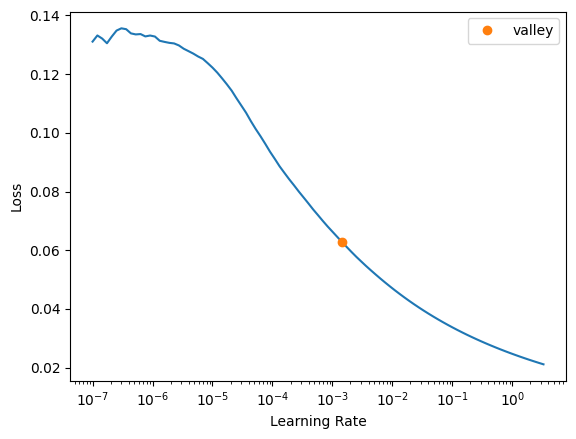

In [34]:
lr = learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time
0,0.175387,0.014738,0.671480,00:00
1,0.106366,0.013904,0.685921,00:00
2,0.073579,0.014024,0.654633,00:00
3,0.056982,0.014079,0.658243,00:00
4,0.046504,0.013316,0.667870,00:00
5,0.038788,0.012044,0.707581,00:00
6,0.033051,0.010847,0.726835,00:00
7,0.028716,0.009901,0.734055,00:00
8,0.025307,0.009185,0.753309,00:00
9,0.022526,0.008584,0.761733,00:00


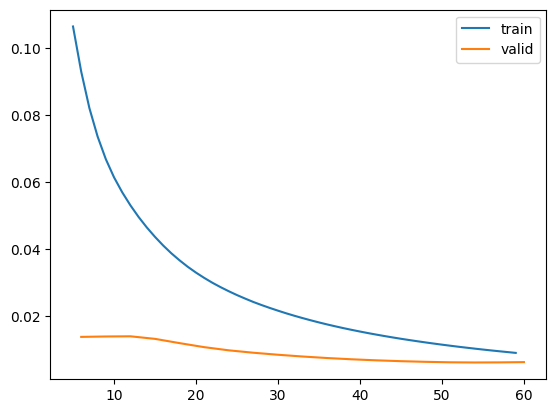

In [35]:
learn.fit(20, 1e-3, wd=0.01)
learn.recorder.plot_loss()

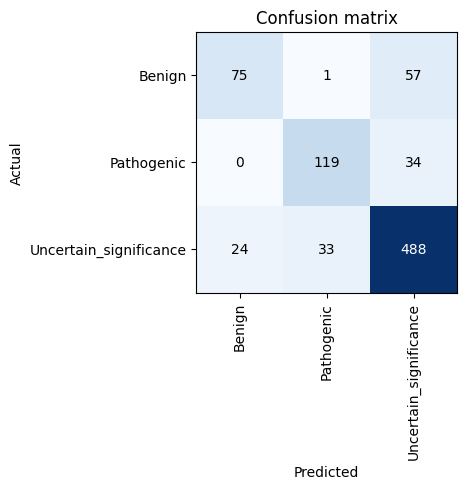

In [36]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

##### Sottoinsieme 'Benign' e 'Likely Benign'

In [37]:
df = pd.read_csv('clinvar.hg19.chr21.dbnsfp.tsv', sep='\t')
mixed_type = [98,99,101,102,131,132,133,134,135,136,153,154,155,169,170,171,172,646,650,651,675,676,677,678,679,681,682,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,705,706,717,718,719,720,721,722,723,724,725,730]
for column in mixed_type:
    df.iloc[:, column] = pd.to_numeric(df.iloc[:, column], errors='coerce')
df.replace(to_replace='.', value=np.nan, inplace=True)
df.replace(regex='^[.;]+$', value=np.nan, inplace=True)
df.dropna(axis='rows', how='any', inplace=True, subset=['clinvar_clnsig'])
df.dropna(axis='columns', thresh=int(len(df.index)*0.8), inplace=True)
df.drop(axis='index', labels=df[df.clinvar_clnsig == 'not_provided'].index, inplace=True)
df.drop(axis='index', labels=df[df.clinvar_clnsig == 'protective'].index, inplace=True)
df.drop(axis='index', labels=df[df.clinvar_clnsig == 'risk_factor'].index, inplace=True)
df.drop(axis='index', labels=df[df.clinvar_clnsig == 'Conflicting_interpretations_of_pathogenicity,_risk_factor'].index, inplace=True)
df.drop(axis='index', labels=df[df.clinvar_clnsig == 'Conflicting_interpretations_of_pathogenicity,_other,_risk_factor'].index, inplace=True)
df.replace(to_replace='Conflicting_interpretations_of_pathogenicity', value='Uncertain_significance', inplace=True)
df.replace(to_replace='Benign/Likely_benign', value='Benign', inplace=True)
df.replace(to_replace='Pathogenic/Likely_pathogenic', value='Pathogenic', inplace=True)
df.drop(axis='index', labels=df[df.clinvar_clnsig == 'Likely_pathogenic'].index, inplace=True)
df.drop(axis='index', labels=df[df.clinvar_clnsig == 'Pathogenic'].index, inplace=True)
df.drop(axis='index', labels=df[df.clinvar_clnsig == 'Uncertain_significance'].index, inplace=True)
df.value_counts('clinvar_clnsig')


/tmp/ipykernel_35141/74861629.py:1: DtypeWarning: Columns (98,99,101,102,131,132,133,134,135,136,153,154,155,169,170,171,172,646,650,651,675,676,677,678,679,681,682,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,705,706,717,718,719,720,721,722,723,724,725,730) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('clinvar.hg19.chr21.dbnsfp.tsv', sep='\t')


clinvar_clnsig
Benign           382
Likely_benign    274
Name: count, dtype: int64

In [38]:
splits = RandomSplitter(valid_pct=0.2, seed=42)(range_of(df))
df_data = df.drop(columns=['clinvar_clnsig'], inplace=False)
num_cols = df_data.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df_data.select_dtypes(include=[object]).columns.tolist()
df.select_dtypes(include=[np.number]).replace(to_replace=np.nan, value=0, inplace=True)
df = df.sample(frac=1).reset_index(drop=True)

In [39]:
to = TabularPandas(df, procs=[Categorify, FillMissing, Normalize],
                   cat_names = cat_cols,
                   cont_names = num_cols,
                   y_names='clinvar_clnsig',
                    y_block=CategoryBlock(),
                   splits=splits)

In [40]:
dls = to.dataloaders(bs=256)

In [41]:
learn_B = tabular_learner(dls, metrics=accuracy)

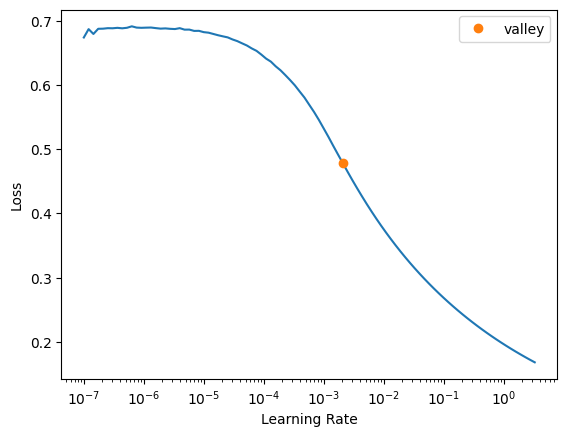

In [42]:
lr = learn_B.lr_find()

epoch,train_loss,valid_loss,accuracy,time
0,0.738407,0.675295,0.587786,00:00
1,0.617406,0.675838,0.549618,00:00
2,0.510840,0.672701,0.557252,00:00
3,0.416456,0.661232,0.580153,00:00
4,0.340369,0.649258,0.603053,00:00
5,0.283363,0.635594,0.618321,00:00
6,0.240113,0.623282,0.633588,00:00
7,0.206941,0.609522,0.633588,00:00
8,0.180801,0.596064,0.641221,00:00
9,0.159743,0.582879,0.671756,00:00


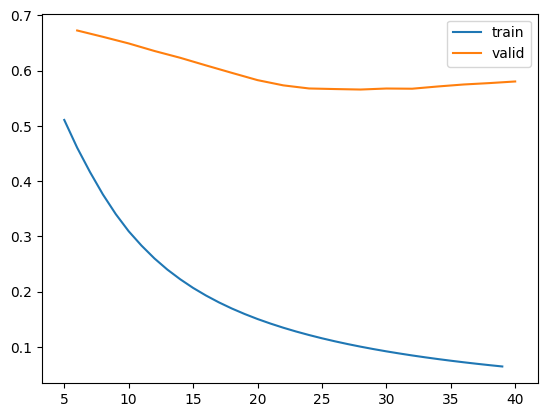

In [43]:
torch.cuda.empty_cache()
learn_B.fit(20, lr)
learn_B.recorder.plot_loss()

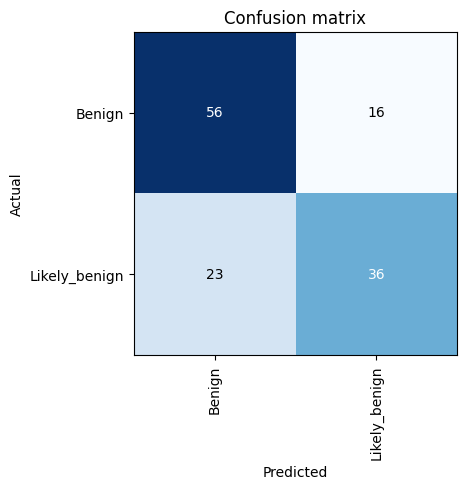

In [44]:
interp = ClassificationInterpretation.from_learner(learn_B)
interp.plot_confusion_matrix()

##### Sottoinsieme 'Pathogenic' e 'Likely Pathogenic'

In [45]:
df = pd.read_csv('clinvar.hg19.chr21.dbnsfp.tsv', sep='\t')
mixed_type = [98,99,101,102,131,132,133,134,135,136,153,154,155,169,170,171,172,646,650,651,675,676,677,678,679,681,682,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,705,706,717,718,719,720,721,722,723,724,725,730]
for column in mixed_type:
    df.iloc[:, column] = pd.to_numeric(df.iloc[:, column], errors='coerce')
df.replace(to_replace='.', value=np.nan, inplace=True)
df.replace(regex='^[.;]+$', value=np.nan, inplace=True)
df.dropna(axis='rows', how='any', inplace=True, subset=['clinvar_clnsig'])
df.dropna(axis='columns', thresh=int(len(df.index)*0.8), inplace=True)
df.drop(axis='index', labels=df[df.clinvar_clnsig == 'not_provided'].index, inplace=True)
df.drop(axis='index', labels=df[df.clinvar_clnsig == 'protective'].index, inplace=True)
df.drop(axis='index', labels=df[df.clinvar_clnsig == 'risk_factor'].index, inplace=True)
df.drop(axis='index', labels=df[df.clinvar_clnsig == 'Conflicting_interpretations_of_pathogenicity,_risk_factor'].index, inplace=True)
df.drop(axis='index', labels=df[df.clinvar_clnsig == 'Conflicting_interpretations_of_pathogenicity,_other,_risk_factor'].index, inplace=True)
df.replace(to_replace='Conflicting_interpretations_of_pathogenicity', value='Uncertain_significance', inplace=True)
df.replace(to_replace='Benign/Likely_benign', value='Benign', inplace=True)
df.replace(to_replace='Pathogenic/Likely_pathogenic', value='Pathogenic', inplace=True)
df.drop(axis='index', labels=df[df.clinvar_clnsig == 'Likely_benign'].index, inplace=True)
df.drop(axis='index', labels=df[df.clinvar_clnsig == 'Benign'].index, inplace=True)
df.drop(axis='index', labels=df[df.clinvar_clnsig == 'Uncertain_significance'].index, inplace=True)
df.value_counts('clinvar_clnsig')


/tmp/ipykernel_35141/2940515063.py:1: DtypeWarning: Columns (98,99,101,102,131,132,133,134,135,136,153,154,155,169,170,171,172,646,650,651,675,676,677,678,679,681,682,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,705,706,717,718,719,720,721,722,723,724,725,730) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('clinvar.hg19.chr21.dbnsfp.tsv', sep='\t')


clinvar_clnsig
Pathogenic           530
Likely_pathogenic    273
Name: count, dtype: int64

In [46]:
splits = RandomSplitter(valid_pct=0.2, seed=42)(range_of(df))
df_data = df.drop(columns=['clinvar_clnsig'], inplace=False)
num_cols = df_data.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df_data.select_dtypes(include=[object]).columns.tolist()
df.select_dtypes(include=[np.number]).replace(to_replace=np.nan, value=0, inplace=True)
df = df.sample(frac=1).reset_index(drop=True)

In [47]:
to = TabularPandas(df, procs=[Categorify, FillMissing, Normalize],
                   cat_names = cat_cols,
                   cont_names = num_cols,
                   y_names='clinvar_clnsig',
                    y_block=CategoryBlock(),
                   splits=splits)

In [48]:
dls = to.dataloaders(bs=64)

In [49]:
learn_P = tabular_learner(dls, metrics=accuracy, loss_func=FocalLossFlat(gamma=0.8))

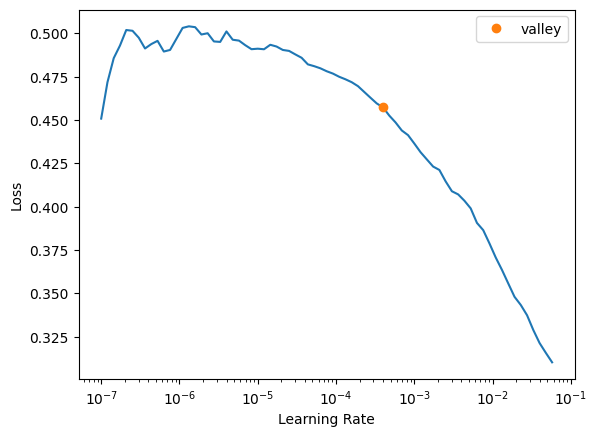

In [50]:
lr = learn_P.lr_find()

epoch,train_loss,valid_loss,accuracy,time
0,0.500184,0.807647,0.337500,00:00
1,0.397700,1.462892,0.375000,00:00
2,0.336233,3.510289,0.581250,00:00
3,0.284668,9.033597,0.700000,00:00
4,0.234813,24.711317,0.725000,00:00
5,0.189660,56.258125,0.712500,00:00
6,0.153143,125.447891,0.731250,00:00
7,0.123275,247.102570,0.718750,00:00
8,0.099077,458.844635,0.731250,00:00
9,0.079767,755.035706,0.706250,00:00


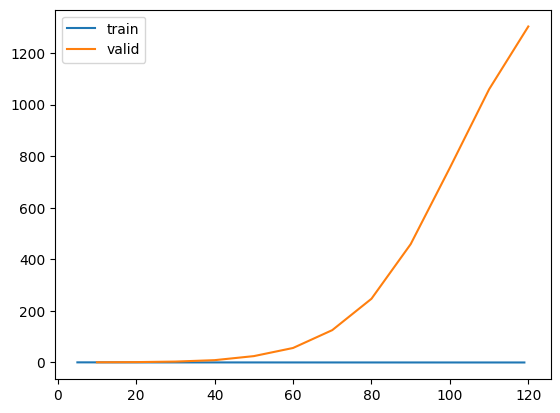

In [51]:
torch.cuda.empty_cache()
learn_P.fit(12, lr)
learn_P.recorder.plot_loss()

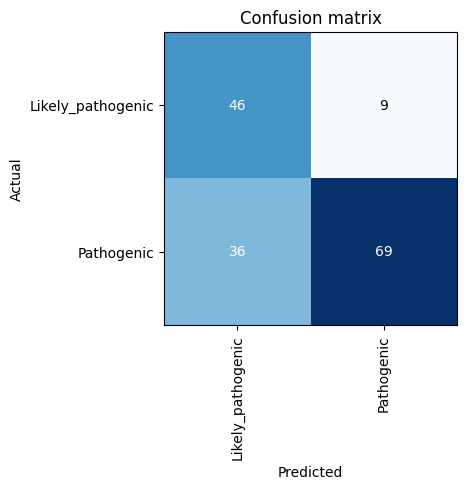

In [52]:
interp = ClassificationInterpretation.from_learner(learn_P)
interp.plot_confusion_matrix()

##### Predizioni su clinvar.cancer

In [57]:
test_df = pd.read_csv('clinvar.hg19.chr21.dbnsfp.cancer.tsv', sep='\t')
mixed_type = [98,99,101,102,131,132,133,134,135,136,153,154,155,169,170,171,172,646,650,651,675,676,677,678,679,681,682,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,705,706,717,718,719,720,721,722,723,724,725,730]
for column in mixed_type:
    test_df[test_df.columns[column]] = pd.to_numeric(test_df[test_df.columns[column]], errors='coerce')
test_df.replace(to_replace='.', value=np.nan, inplace=True)
test_df.replace(regex='^[.;]+$', value=np.nan, inplace=True)
test_df.dropna(axis='rows', how='any', inplace=True, subset=['clinvar_clnsig'])
test_df.drop(axis='index', labels=test_df[test_df.clinvar_clnsig == 'not_provided'].index, inplace=True)
test_df.drop(axis='index', labels=test_df[test_df.clinvar_clnsig == 'protective'].index, inplace=True)
test_df.drop(axis='index', labels=test_df[test_df.clinvar_clnsig == 'risk_factor'].index, inplace=True)
test_df.drop(axis='index', labels=test_df[test_df.clinvar_clnsig == 'Conflicting_interpretations_of_pathogenicity,_risk_factor'].index, inplace=True)
test_df.drop(axis='index', labels=test_df[test_df.clinvar_clnsig == 'Conflicting_interpretations_of_pathogenicity,_other,_risk_factor'].index, inplace=True)
test_df.replace(to_replace='Conflicting_interpretations_of_pathogenicity', value='Uncertain_significance', inplace=True)
test_df.replace(to_replace='Benign/Likely_benign', value='Likely_benign', inplace=True)
test_df.replace(to_replace='Pathogenic/Likely_pathogenic', value='Likely_pathogenic', inplace=True)
test_df.replace(to_replace='Likely_pathogenic', value='Pathogenic', inplace=True)
test_df.replace(to_replace='Likely_benign', value='Benign', inplace=True)
test_df.fillna(0, inplace=True)
#targets = test_df.pop('clinvar_clnsig')
test_dl = dls.test_dl(test_df)
learn.validate(dl=test_dl)

/tmp/ipykernel_35141/4291091365.py:1: DtypeWarning: Columns (650,651,681,682,684,685,717) have mixed types. Specify dtype option on import or set low_memory=False.
  test_df = pd.read_csv('clinvar.hg19.chr21.dbnsfp.cancer.tsv', sep='\t')


AssertionError: nan values in `SiPhy_29way_logOdds` but not in setup training set

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

preds, targets = learn.get_preds(dl=test_dl)
pred_classes = np.argmax(preds, axis=1)

# Flattening delle etichette di classe
true_classes = targets.squeeze().numpy()

# Calcola la matrice di confusione
conf_matrix = confusion_matrix(true_classes, pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=dls.vocab)
disp.plot(xticks_rotation='vertical')